# Final Project - Maintaining EV customers

---------------
## Context
---------------
This dataset presents results from a survey of FCV and BEV and compared the sociodeographic profile of FCV buyers vs BEV Households.  


-----------------
## Objective
-----------------
Based on the data we want to identify Current FCV & BEV Owners Demographics and see if there are any major differences between the two car owners.  

For our ML model we will attemp to predict based on the information if we can identify the customer as a FCV or BEV owner.  

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:
- When the customer submitted their data
- If they Previously Owned a PHEV, BEV, HEV, CNG
- Household Income
- Importance of Reducing Greenhouse Emissions
- Demographics of the customer current car (year, manufacture, model)
- Demographics on the customer's (home type, ownership of home,  education, gender, age, # of people in household)
- Demographics on customers car usage (longest trip, number of trips over 200 miles, one way commute distance, annual VMT vehicle miles traveled)
- If the customer is currently a FCV or BEV Current Owner


#### Acronyms used
- BEV: Battery Electric Vehicle
- FCV: Fuel Cell Vehicle (Hydrogen fuel cell vehicle)
- PHEV: Plug-in hybrid electric vehicle
- CNG: Compressed Natural Gas (everyday car)

### Import the necessary libraries or dependencies

In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

###  Read the Cleaned Dataset 

In [2]:
#Import File
fcv_df = pd.read_csv('FCV_Dataset2.csv')

### Examine Dataset 

In [3]:
fcv_df.head()

,Unnamed: 0,Month Submitted,Year Submitted,lastpage. Last page,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",...,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy",Model Year,Manufacturer,Model
0,0,6,2017,42.0,1,0,0,0,275000.0,2,...,0.01,2,65,0,2,14622,0.0,2016,Toyota,Mirai
1,1,6,2017,42.0,0,0,1,0,275000.0,2,...,10.69,3,65,0,3,9197,0.0,2016,Toyota,Mirai
2,4,6,2017,42.0,1,0,0,0,125000.0,2,...,17.63,2,55,0,3,5082,0.0,2017,Toyota,Mirai
3,8,6,2017,42.0,0,0,0,0,125000.0,2,...,13.35,4,45,0,2,13224,0.0,2017,Toyota,Mirai
4,9,6,2017,42.0,1,0,1,0,225000.0,1,...,34.77,4,45,0,3,16080,0.0,2017,Honda,Clarity


### The dimension of the `data` dataframe. (shape, r x c)

In [4]:
fcv_df.shape

(3504, 25)

#### Observations: 
The original dataset has 27,021 rows and 25 columns

### Data Types/Categorical vs. Numerical Columns

In [5]:
fcv_df.dtypes

Unnamed: 0                                                                           int64
Month Submitted                                                                      int64
Year Submitted                                                                       int64
lastpage. Last page                                                                float64
Previous PHEVs                                                                       int64
Previous BEVs                                                                        int64
Previous HEVs                                                                        int64
Previous CNGs                                                                        int64
Household Income                                                                   float64
Importance of reducing greenhouse gas emissions (-3 not important, 3 important)      int64
Home ownership (own 1)                                                               int64

In [6]:
fcv_df.shape

(3504, 25)

### Summary Statistics

In [7]:
fcv_df.describe()

,Unnamed: 0,Month Submitted,Year Submitted,lastpage. Last page,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",...,Highest Level of Education,Longest trip in the last 12 months,Number of trips over 200 miles in the last 12 months,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy"
count,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,...,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000
mean,9662.882705,6.494578,2016.025400,43.544521,0.099315,0.164954,0.212614,0.005708,195105.593607,1.272831,...,3.387557,322.725908,1.589326,17.179247,2.994292,47.617009,0.231164,2.433219,11795.009132,0.946632
std,5937.770130,1.931151,0.833351,1.195320,0.299127,0.371192,0.409215,0.075345,89142.296972,1.214760,...,0.674078,196.608604,4.010692,13.943950,1.101460,10.904066,0.421637,0.723642,5714.595987,0.224797
min,0.000000,4.000000,2015.000000,3.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,-3.000000,...,1.000000,0.210000,0.000000,0.000000,1.000000,25.000000,0.000000,1.000000,10.000000,0.000000
25%,4247.000000,5.000000,2015.000000,43.000000,0.000000,0.000000,0.000000,0.000000,125000.000000,1.000000,...,3.000000,162.127500,0.000000,6.757500,2.000000,35.000000,0.000000,2.000000,8000.000000,1.000000
50%,9660.000000,6.000000,2016.000000,43.000000,0.000000,0.000000,0.000000,0.000000,175000.000000,2.000000,...,3.000000,297.805000,0.000000,14.330000,3.000000,45.000000,0.000000,2.000000,10770.000000,1.000000
75%,14890.500000,8.000000,2017.000000,45.000000,0.000000,0.000000,0.000000,0.000000,237500.000000,2.000000,...,4.000000,418.937500,1.000000,23.562500,4.000000,55.000000,0.000000,3.000000,14306.250000,1.000000
max,19724.000000,11.000000,2017.000000,45.000000,1.000000,1.000000,1.000000,1.000000,425000.000000,3.000000,...,4.000000,1052.300000,48.000000,99.450000,5.000000,65.000000,1.000000,4.000000,41532.000000,1.000000


In [8]:
fcv_df = fcv_df.drop(columns= 'Unnamed: 0', axis=1)

In [9]:
fcv_df.columns

Index(['Month Submitted', 'Year Submitted', 'lastpage. Last page',
       'Previous PHEVs', 'Previous BEVs', 'Previous HEVs', 'Previous CNGs',
       'Household Income',
       'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)',
       'Home ownership (own 1)', 'Home Type (detached 1)',
       'Highest Level of Education', 'Longest trip in the last 12 months',
       'Number of trips over 200 miles in the last 12 months',
       'One-way commute distance', 'Number of people in the household', 'Age',
       'Gender (Male 1)', 'Number of vehicles in the household',
       'Annual VMT Estimate', 'FCV, BEV Dummy', 'Model Year', 'Manufacturer',
       'Model'],
      dtype='object')

# Machine Learning Models

## **Proposed Approach**

*1. Potential techniques** 

- Redoing descriptive analysis of data with dropping outliers and missing values. Interesting to consider the tradeoff of dropping values vs filling with median and mode. Filling with median and mode is useful, because the classification algorithm is looking for vectors of deviation from median or mode, and is probably the best way to treat unknowns. Although, you might gain different insights from classifying only on complete rows (but those might be all “good” loans, so there’s risk there too).
 - Consider different classifiers to train the data:
    * LogisticRegression
    * RandomForestClassifier
    * GradientBoostingClassifier
    * DecisionTreeClassifier
    * XGBClassifier
   
-Consider which of the following metrics should be used:
   * Accuracy, Recall, Precision
   * F1 Score
   * Receiving Operating Characteristics(ROC),Area under the Curve(AUC)
   * Log Loss

**2. Proposed Model Solution** 

1. Data preparation
    - deal with imbalanced data sets
    - use class_weights value in the Decision Tree and Random Forest Classifier hyperparameter value
    - Creating dummy variables for the categorical variables - Hot Encoding
2. Partition the data into a train and test set
    * Identify Independent Variables
    * Identify Dependent (Response/Target) Variable
    * Separating the independent variables (X) and the dependent variable (Y)
    * Split Data - use stratified sampling
3. Use Decision Tree and Random Forest Classifer to build a model on the train data.
    * Consider entrophy, information gain, and the ginni index
    * Use recall to minimize False Negatives
    * Use confusion matric to evaluate metrics and thus the model
    * Check for overfitting
4. Tune the model if required
    * list of hyperparameters that can be tuned
    * K-fold cross-validation of the parameters- maximize the score and early stopping to avoid overfitting.
    * Random Search or Grid Search
5. Test the data on the test set.
    * Evaluate feature importance
    * Evaluate metrics with confusion matrix

**3. Measures of success**

- Examine testing data on model and comparing its predictions to the actual predictions. 
- High recall value
- Examine feature importance - does it make sense?
- How robust is our model?


# **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## Data Preprocessing for Modeling

* Scaling/Normalizing
* Apply encoding on the dataframe data

In [10]:
# copy the dataset
df = fcv_df.copy()

### **Separating the target variable from other variables**

In [11]:
le = LabelEncoder()
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Model'] = le.fit_transform(df['Model'])

In [12]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
df = df.drop(['Model Year'], axis = 1)
X = df.drop(["FCV, BEV Dummy"], axis = 1)
# Create y(dependent varibale)
y = df["FCV, BEV Dummy"]

In [73]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3499    1.0
3500    1.0
3501    1.0
3502    1.0
3503    1.0
Name: FCV, BEV Dummy, Length: 3504, dtype: float64

Before we scale, we need to perform the train-test split...or so I thought


# Scaling the data


std_scale = StandardScaler()
X_train_stdscale = std_scale.fit(X)
X_train_stdscale = X_train_stdscale.transform(X)

X_test_stdscale = std_scale.transform(X_test)


In [13]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [14]:
# Split the data into training and test set
X_train_stdscale, X_test_stdscale, y_train, y_test = train_test_split(
X_scaled, y, test_size = 0.30, random_state = 1, stratify = y)

The StandardScaler will scale features to be the standard deviation from the mean for that feature. Thus we have a range of values both positive and negative.

In [15]:
X_test_stdscale

,Month Submitted,Year Submitted,lastpage. Last page,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),...,Longest trip in the last 12 months,Number of trips over 200 miles in the last 12 months,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,Manufacturer,Model
2511,-0.256142,1.169663,1.217822,-0.332063,-0.444454,1.92441,-0.075766,2.018347,0.598697,0.408928,...,-1.297615,0.601147,0.399567,0.005183,0.677183,-0.548332,-0.598750,1.085969,0.750497,0.223833
2465,-0.256142,1.169663,1.217822,-0.332063,-0.444454,-0.51964,-0.075766,-0.786558,0.598697,0.408928,...,2.759093,-0.396329,0.629090,-0.902833,-2.074477,-0.548332,-0.598750,-0.018378,-1.647152,-1.170911
1239,-0.774041,-1.230630,-0.455609,-0.332063,-0.444454,-0.51964,-0.075766,-0.225577,0.598697,-2.445420,...,-1.278895,-0.396329,-0.276808,-0.902833,-1.157257,-0.548332,-0.598750,0.984285,0.270967,-0.241082
2734,-0.256142,1.169663,1.217822,-0.332063,2.249952,-0.51964,-0.075766,1.457366,0.598697,0.408928,...,-0.483496,-0.396329,0.603269,0.005183,-0.240037,-0.548332,0.783345,0.560923,0.270967,-0.241082
153,1.815457,1.169663,-1.292324,-0.332063,-0.444454,-0.51964,-0.075766,-0.225577,0.598697,-2.445420,...,-0.624507,2.097362,1.797506,0.913199,0.677183,-0.548332,0.783345,1.899441,0.990262,-0.008624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,-1.291941,-1.230630,-0.455609,-0.332063,-0.444454,-0.51964,-0.075766,0.896385,0.598697,0.408928,...,-0.155691,-0.396329,0.832792,0.913199,-0.240037,-0.548332,0.783345,0.175889,0.270967,-0.241082
71,-0.256142,1.169663,-1.292324,-0.332063,2.249952,1.92441,-0.075766,0.896385,-0.224629,0.408928,...,-0.767044,1.099886,-1.060772,-1.810849,1.594403,-0.548332,-1.980846,-0.705489,0.990262,-0.008624
1817,0.779658,-0.030483,-0.455609,-0.332063,-0.444454,-0.51964,-0.075766,0.335404,-1.047954,0.408928,...,-0.195879,-0.396329,0.156417,0.913199,0.677183,-0.548332,0.783345,0.035877,0.270967,-0.241082
3023,-0.256142,1.169663,1.217822,-0.332063,2.249952,-0.51964,-0.075766,0.335404,0.598697,0.408928,...,0.283263,-0.146960,-1.088746,-0.902833,1.594403,-0.548332,-0.598750,-0.371559,0.750497,0.456290


In [16]:
X_test_stdscale.shape

(1052, 22)

In [17]:
X_train_stdscale

,Month Submitted,Year Submitted,lastpage. Last page,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),...,Longest trip in the last 12 months,Number of trips over 200 miles in the last 12 months,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,Manufacturer,Model
1857,1.297558,-0.030483,-0.455609,-0.332063,-0.444454,-0.51964,-0.075766,0.335404,0.598697,0.408928,...,0.163567,-0.396329,0.450493,1.821214,-0.240037,1.823712,0.783345,0.125134,0.270967,-0.241082
2284,1.297558,-0.030483,-0.455609,-0.332063,-0.444454,1.92441,-0.075766,-0.225577,0.598697,0.408928,...,-0.572009,0.102409,-0.807580,-0.902833,1.594403,-0.548332,0.783345,-0.161016,0.750497,0.223833
3015,-0.256142,1.169663,1.217822,-0.332063,2.249952,-0.51964,-0.075766,0.335404,0.598697,0.408928,...,-0.615808,-0.396329,-0.944576,-0.902833,0.677183,-0.548332,-0.598750,-0.739617,1.230027,1.851034
1428,-0.256142,-0.030483,-0.455609,-0.332063,2.249952,-0.51964,-0.075766,1.457366,0.598697,0.408928,...,-0.997229,0.850517,-0.914452,-1.810849,0.677183,-0.548332,-0.598750,-0.765519,0.750497,0.223833
2375,1.297558,-0.030483,-0.455609,-0.332063,-0.444454,-0.51964,-0.075766,-0.225577,-1.047954,0.408928,...,-0.038182,-0.396329,-0.725095,0.005183,-1.157257,-0.548332,-0.598750,-1.020517,1.230027,1.851034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,-1.291941,-1.230630,-0.455609,-0.332063,-0.444454,-0.51964,-0.075766,-0.225577,0.598697,0.408928,...,-0.370158,-0.396329,-0.161329,0.005183,0.677183,-0.548332,0.783345,-0.314154,0.270967,-0.241082
2514,-0.256142,1.169663,1.217822,3.011472,-0.444454,-0.51964,-0.075766,2.018347,0.598697,0.408928,...,-0.331904,0.601147,-0.167785,0.913199,0.677183,-0.548332,0.783345,0.795969,0.750497,0.223833
297,-1.291941,-1.230630,-0.455609,-0.332063,2.249952,1.92441,-0.075766,0.335404,0.598697,0.408928,...,0.673282,-0.396329,-0.117576,0.005183,0.677183,-0.548332,-0.598750,0.035877,0.990262,0.688748
148,1.815457,1.169663,-1.292324,-0.332063,2.249952,-0.51964,-0.075766,-1.628030,0.598697,0.408928,...,0.296490,0.102409,-0.530001,-0.902833,1.594403,-0.548332,0.783345,1.400997,0.990262,-0.008624


In [18]:
X_train_stdscale.shape

(2452, 22)

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [19]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['FCV(1)', 'BEV (0)'], yticklabels=['FCV (1)', 'BEV (0)'])
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

In [20]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)
    recall = recall_score(target, pred,average = 'macro')              # To compute recall
    precision = precision_score(target, pred, average = 'macro')       # To compute precision
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    
    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )
    return df_perf

In [21]:
##  Function to calculate recall score
def get_accuracy_score2(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    Function name: get_accuracy_score
    Determine the accuracy score from the confusion matrix

    Accuracy = TP + TN/(TP + FN + TN + FP)  
    """
    prediction = model.predict(predictors)
    return accuracy_score(target, prediction)

## Predictive Analysis/Building Models

### **Build a Logistic Regression Model** 

- **Typically tree based classifiers are not influenced by outliers and null values. Logistical regression must deal with outliers and null values.**

Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

In [22]:
# Defining the Logistic regression model
lg = LogisticRegression()
# Fitting the model on the training data 
lg.fit(X_train_stdscale,y_train)

LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       131
         1.0       1.00      1.00      1.00      2321

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



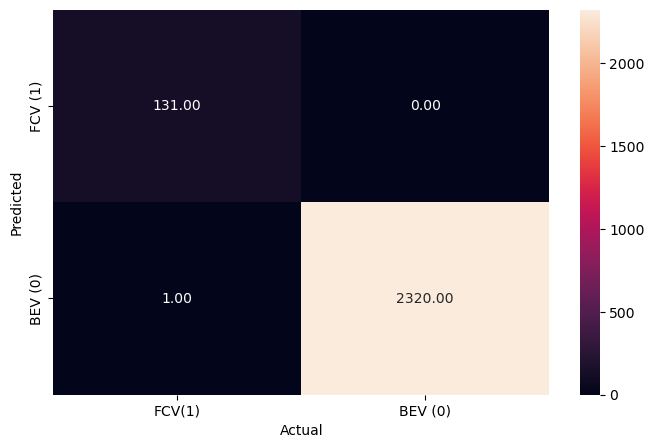

In [23]:
#Predict for train set
y_pred_train = lg.predict(X_train_stdscale)

# Checking the performance on the training data
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       1.00      1.00      1.00       996

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



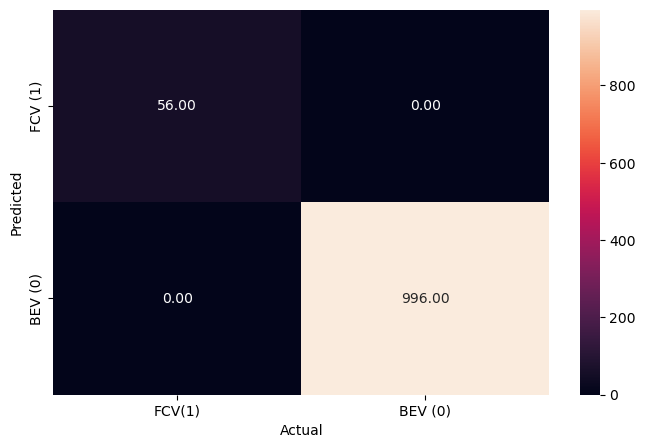

In [24]:
#Predict for test set
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_stdscale)
metrics_score(y_test, y_pred_test)

In [25]:
print("Accuracy Score:", get_accuracy_score2(lg, X_test_stdscale, y_test))

Accuracy Score: 1.0


In [26]:
# Printing the coefficients of logistic regression
cols = X.columns
coef_lg = lg.coef_
pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
lastpage. Last page,2.169915
Previous BEVs,0.151041
Longest trip in the last 12 months,0.123237
Home Type (detached 1),0.107794
Number of people in the household,0.087680
Home ownership (own 1),0.075245
One-way commute distance,0.067670
Gender (Male 1),0.065158
Household Income,0.041726
Model,0.007782


### **Determine the optimal threshold:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold? We can try a different threshold by running a precision-recal curve. 
- How does, accuracy, precision and recall change on the threshold?

### **The Precision-Recall Curve for Logistic Regression**


y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

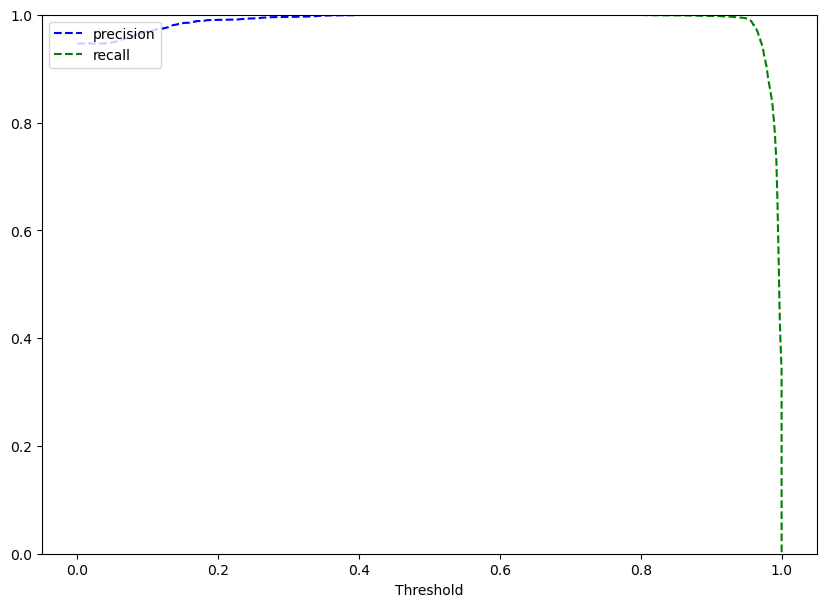

In [27]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve



y_scores_lg = lg.predict_proba(X_train_stdscale) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**

We can see that the precision and the recall are balanced for a threshold of about 1. So, any output >= 1 will belong to class 1 (FEV). 

The optimal threshold for our model is going to be corresponding to the point on the curve which is closest to where precision and recall intersect right before recall takes a dive.

Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. 

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Precision = fraction of TP/TP + FP out of all positive predictions which are actually positive
Recall = fraction of  TP/TP+FN, from all the positive predictions how many were predicted correctly.

Accuracy - From all the classes (positive and negative), how many of them we have predicted correctly.


- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

## **Build a Decision Tree Model**

#### **Think about it:**

Typically tree based classifiers are not influenced by outliers and null values. Logistical regression must deal with outliers and null values.

#### Data Preparation for the tree based model

In [28]:
# We have already split the data into training and test set
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, 
                            random_state = 1)

The data is unbalanced so we need to use weights. Try both splits 70:30 and 80:20. Which gives us the higher performance?

In [29]:
#fitting Decision tree model
dt.fit(X_train_stdscale, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       131
         1.0       1.00      1.00      1.00      2321

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



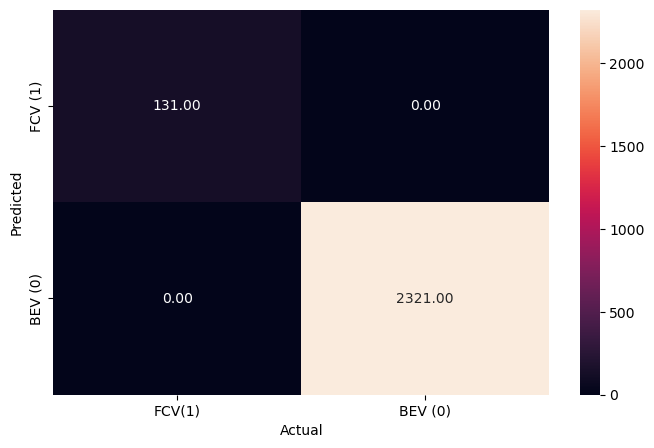

In [30]:
# Checking performance on the training data
y_train_pred_dt = dt.predict(X_train_stdscale)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       1.00      1.00      1.00       996

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



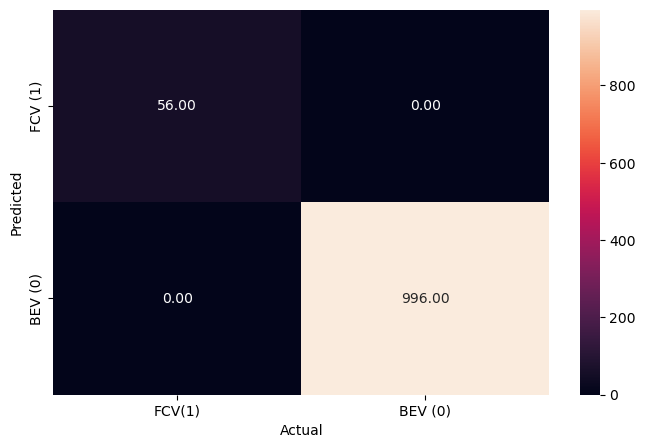

In [31]:
# Checking performance on the testing data
y_test_pred_dt = dt.predict(X_test_stdscale)
metrics_score(y_test, y_test_pred_dt)

In [32]:
print("Accuracy Score:", get_accuracy_score2(dt, X_test_stdscale, y_test))

Accuracy Score: 1.0


- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?
- The decision tree works well on the training data but not so well on the test data as the __________ in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.

### **Decision Tree - Hyperparameter Tuning**


* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

#### Using GridSearchCV for Hyperparameter tuning on the model

In [33]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.2, 1: 0.8})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train_stdscale, y_train)

# Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train_stdscale, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=2,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       131
         1.0       1.00      1.00      1.00      2321

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



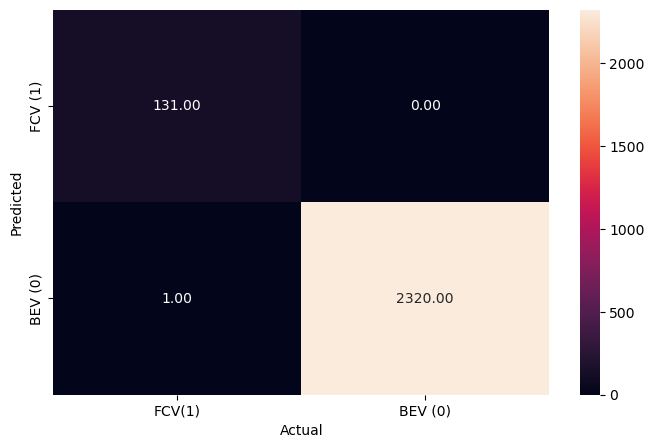

In [35]:
# Checking performance on the training data based on the tuned model
y_train_pred_dt = d_tree_tuned.predict(X_train_stdscale)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       1.00      1.00      1.00       996

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



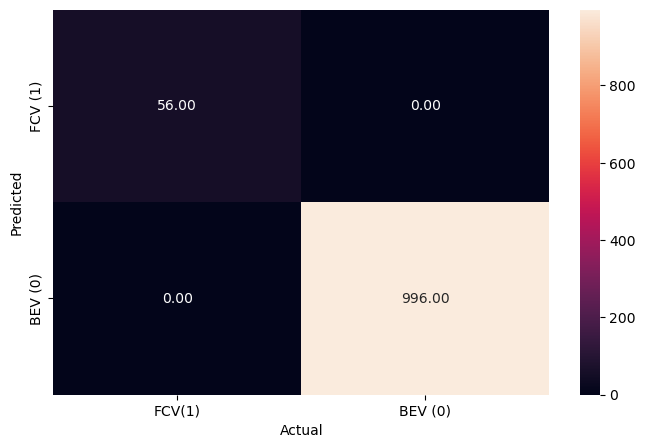

In [36]:
# Checking performance on the testing data based on the tuned model
y_pred_test2 = d_tree_tuned.predict(X_test_stdscale)
metrics_score(y_test, y_pred_test2)

In [37]:
print("Accuracy Score:", get_accuracy_score2(d_tree_tuned, X_test_stdscale, y_test))

Accuracy Score: 1.0


**Observations**

### **Plotting the Decision Tree**

In [38]:
tree_model = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, max_depth = 4,
                       min_samples_leaf = 5, random_state = 1)
# Fit the best algorithm to the data
tree_model.fit(X_train_stdscale, y_train)# Plot the decision  tree and analyze it to build the decision rule

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=4,
                       min_samples_leaf=5, random_state=1)

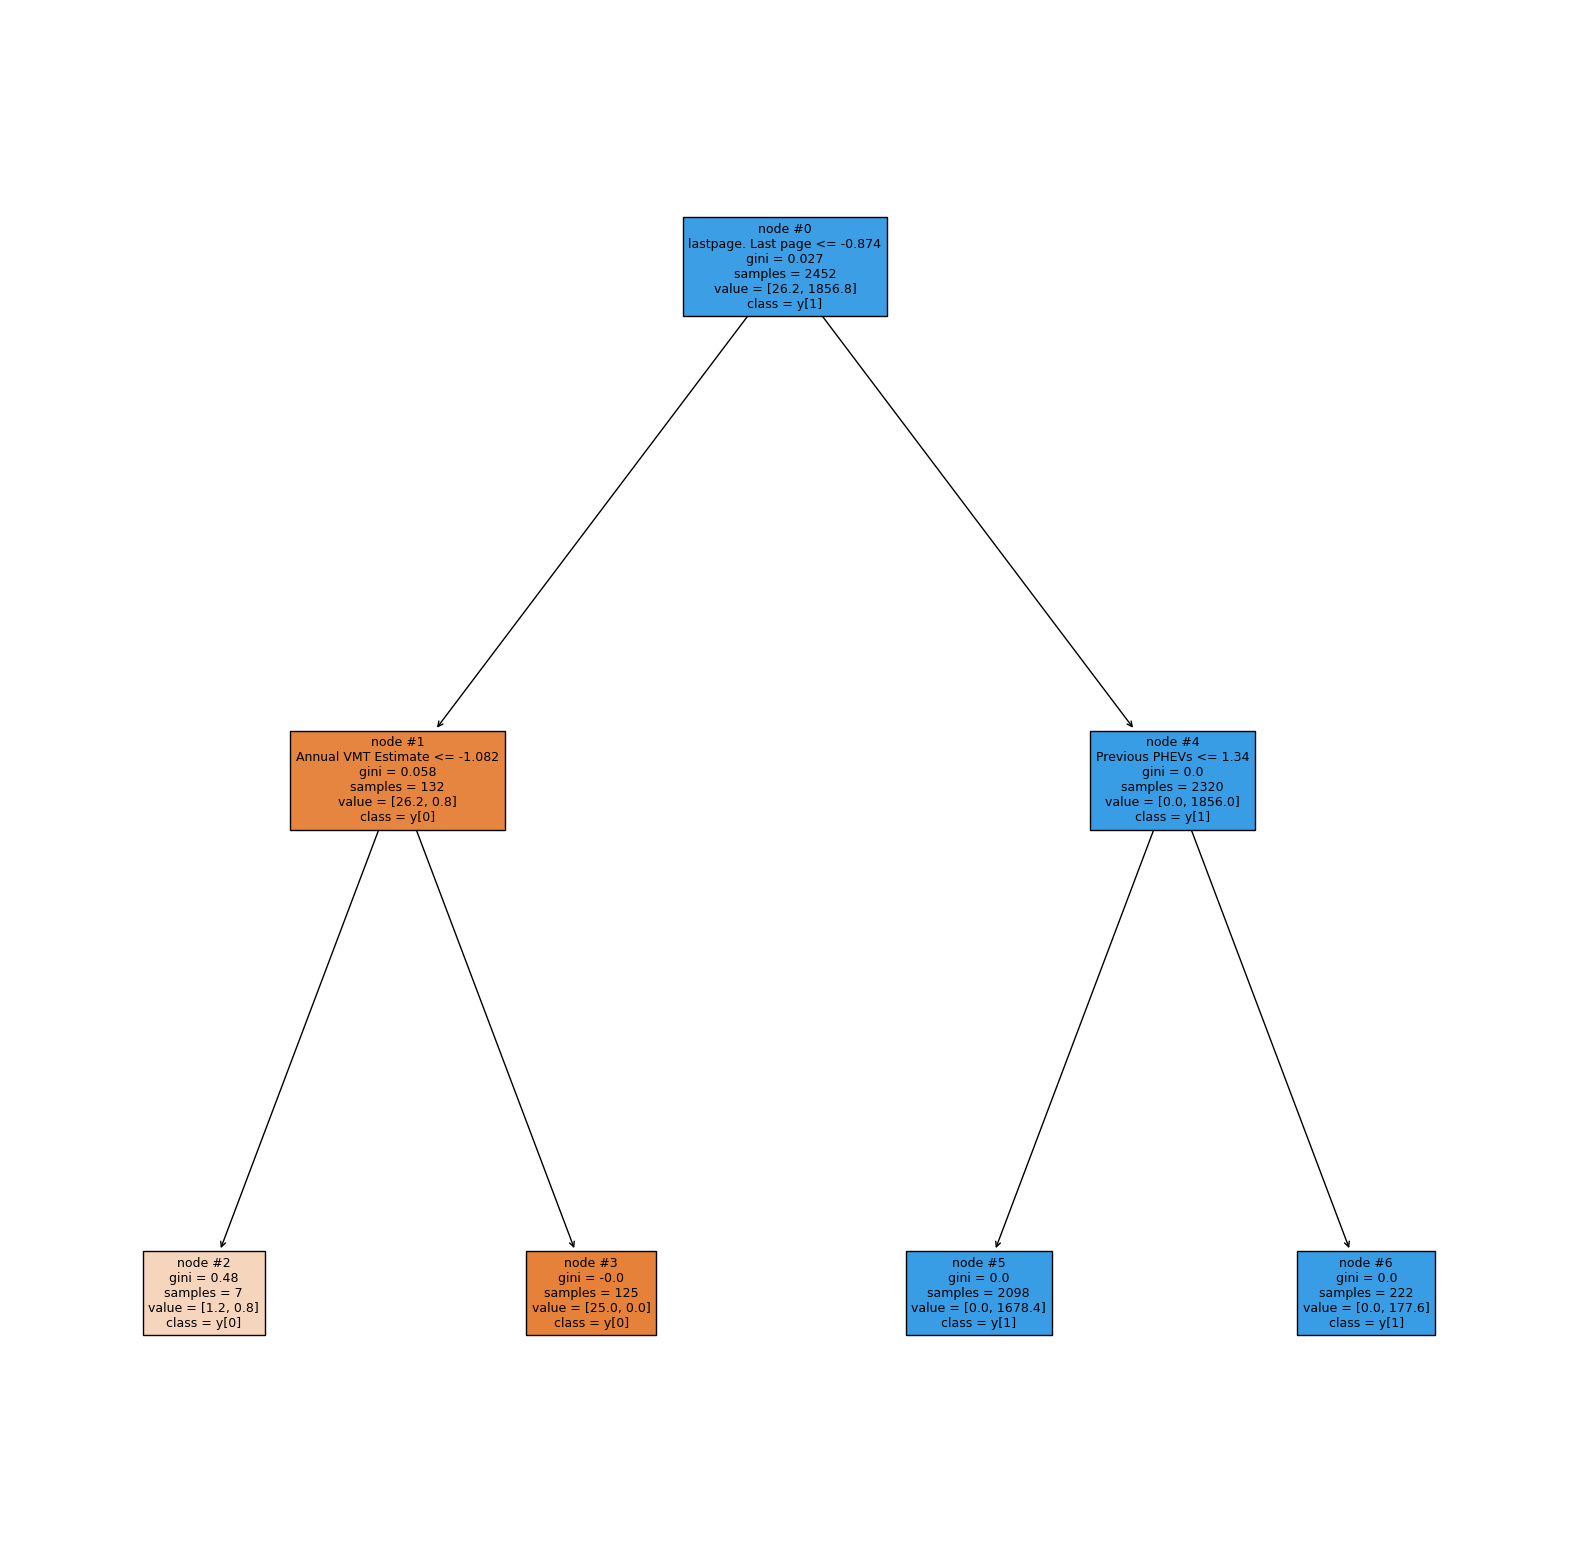

In [39]:
features = list(X.columns)
plt.figure(figsize = (20, 20))
tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

#### Observations:

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [40]:
# Defining Random forest Classifier
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")
rf_estimator.fit(X_train_stdscale,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       131
         1.0       1.00      1.00      1.00      2321

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



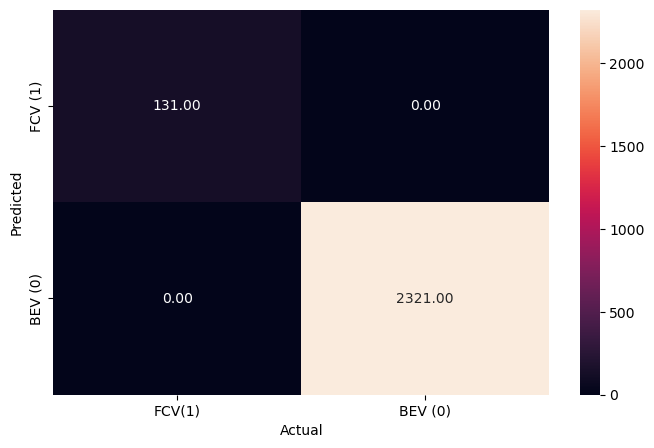

In [41]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train_stdscale)
metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       1.00      1.00      1.00       996

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



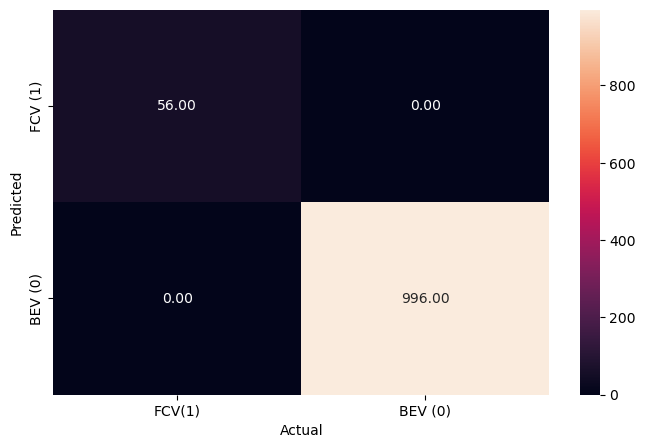

In [42]:
# Checking performance on the test data
y_pred_test3 = rf_estimator.predict(X_test_stdscale)
metrics_score(y_test, y_pred_test3)

In [43]:
print("Accuracy Score:", get_accuracy_score2(rf_estimator, X_test_stdscale, y_test))

Accuracy Score: 1.0


#### Observations

### **Build a Random Forest model with Class Weights**

In [44]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_weights = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, 
                                      random_state = 1)
# Fitting Random Forest model
rf_weights.fit(X_train_stdscale, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       131
         1.0       1.00      1.00      1.00      2321

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



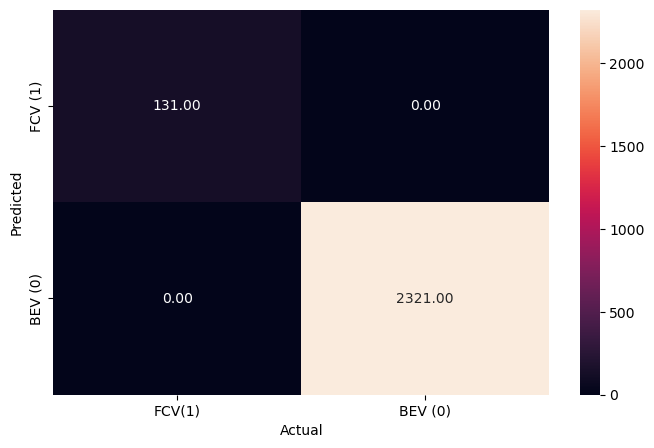

In [45]:
# Checking performance on the train data
y_pred_train4 = rf_weights.predict(X_train_stdscale)
metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       1.00      1.00      1.00       996

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



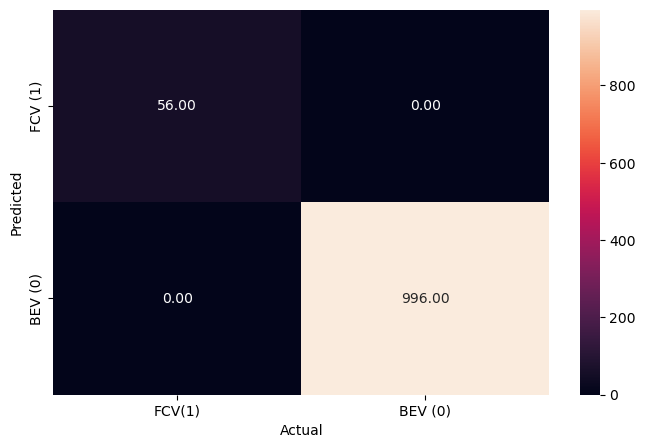

In [46]:
# Checking performance on the test data
y_pred_test4 = rf_weights.predict(X_test_stdscale)
metrics_score(y_test, y_pred_test4)

**The feature importance** of the tuned decision tree 

In [47]:
# Calculate feature importance in the Random Forest model.
importances = rf_estimator.feature_importances_
importances

array([2.94977532e-02, 8.09317307e-02, 5.37845479e-01, 2.71204392e-03,
       9.37758346e-04, 2.91507941e-03, 1.21218613e-04, 3.24651368e-03,
       2.58818765e-03, 8.44231133e-04, 1.37346848e-03, 1.12505208e-03,
       9.19220895e-03, 9.39537871e-03, 6.33504368e-03, 3.09319038e-03,
       4.71368444e-03, 8.59824539e-04, 2.51332229e-03, 9.92192444e-03,
       1.51073631e-01, 1.38763275e-01])

In [48]:
# We can sort the features by their importance.
sorted(zip(rf_estimator.feature_importances_, X.columns), reverse=True)

[(0.5378454793390197, 'lastpage. Last page'),
 (0.1510736310797692, 'Manufacturer'),
 (0.1387632749760696, 'Model'),
 (0.08093173069813091, 'Year Submitted'),
 (0.02949775317578834, 'Month Submitted'),
 (0.009921924442832093, 'Annual VMT Estimate'),
 (0.009395378705251686,
  'Number of trips over 200 miles in the last 12 months'),
 (0.00919220895183971, 'Longest trip in the last 12 months'),
 (0.006335043681110957, 'One-way commute distance'),
 (0.004713684439829501, 'Age'),
 (0.0032465136839044686, 'Household Income'),
 (0.00309319037987959, 'Number of people in the household'),
 (0.002915079408072332, 'Previous HEVs'),
 (0.0027120439165208006, 'Previous PHEVs'),
 (0.0025881876498740656,
  'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)'),
 (0.0025133222868213905, 'Number of vehicles in the household'),
 (0.0013734684785735207, 'Home Type (detached 1)'),
 (0.0011250520761291768, 'Highest Level of Education'),
 (0.0009377583463593499, 'Previous BEVs'),


<AxesSubplot:xlabel='Importance'>

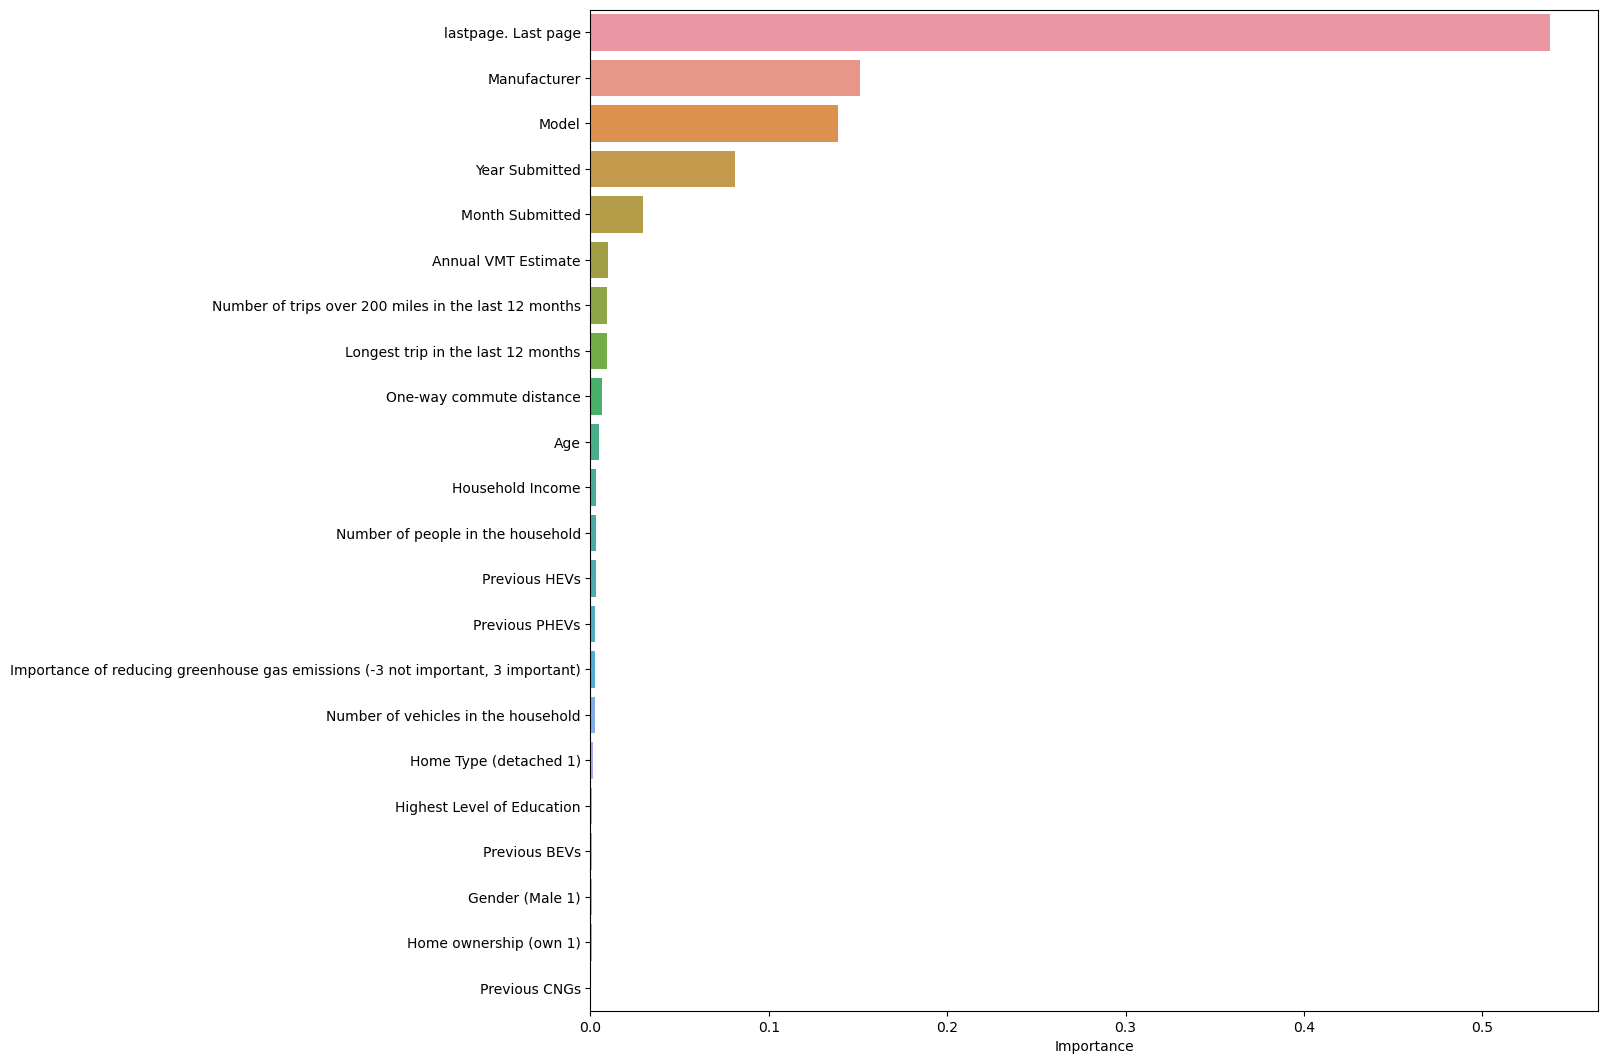

In [49]:
# Plot the feature importance
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))
sns.barplot(importance_df.Importance,importance_df.index)

### **Tuning the Random Forest** 

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

#### **Warning:** This may take a long time depending on the parameters you tune.

In [51]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
# n_estimators are the number of trees
parameters = {"n_estimators": [80, 90, 110],
    "max_depth": [5, 6, 7, 8],
    "max_features": ['auto', 'sqrt']}
# [0.8, 0.9, 1]
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train_stdscale, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [52]:
rf_estimator_tuned_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.2, 1: 0.8},
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       131
         1.0       1.00      1.00      1.00      2321

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



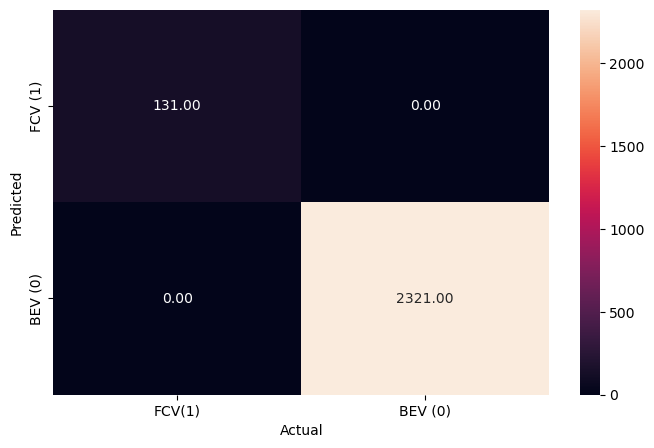

In [53]:
# Checking performance on the training data
y_pred_train_rf_tuned_base = rf_estimator_tuned_base.predict(X_train_stdscale)
metrics_score(y_train, y_pred_train_rf_tuned_base)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       1.00      1.00      1.00       996

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



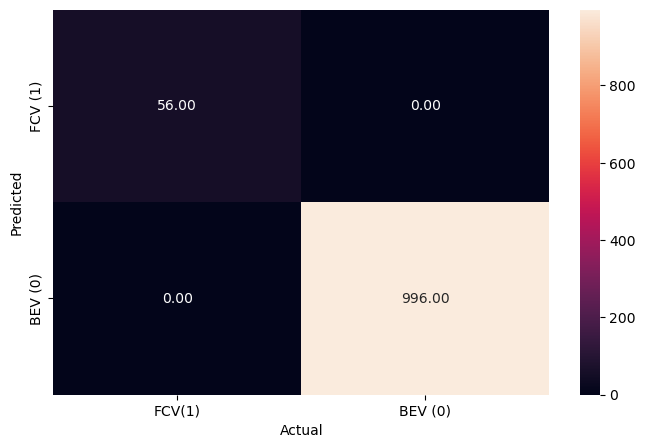

In [54]:
# Checking performace on test dataset
y_pred_test_rf_tuned_base = rf_estimator_tuned_base.predict(X_test_stdscale)
metrics_score(y_test, y_pred_test_rf_tuned_base)

In [55]:
print("Accuracy Score:", get_accuracy_score2(rf_estimator_tuned_base, X_test_stdscale, y_test))


Accuracy Score: 1.0


### **XGBoost**

- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. 


In [56]:
# XGBoost Classifier
# Importing the XGBClassifier from the xgboost library
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb

xgb_model2 = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb_model2.fit(X_train_stdscale,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb_model2,X_test_stdscale,y_test)
xgb_perf_test

,Precision,Recall,Accuracy
0,1.0,1.0,1.0


#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       131
         1.0       1.00      1.00      1.00      2321

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



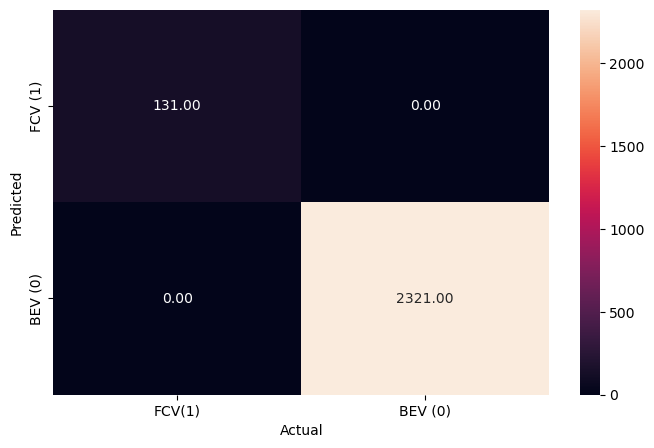

In [57]:
y_pred_train_xgb = xgb_model2.predict(X_train_stdscale)
metrics_score(y_train, y_pred_train_xgb)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       1.00      1.00      1.00       996

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



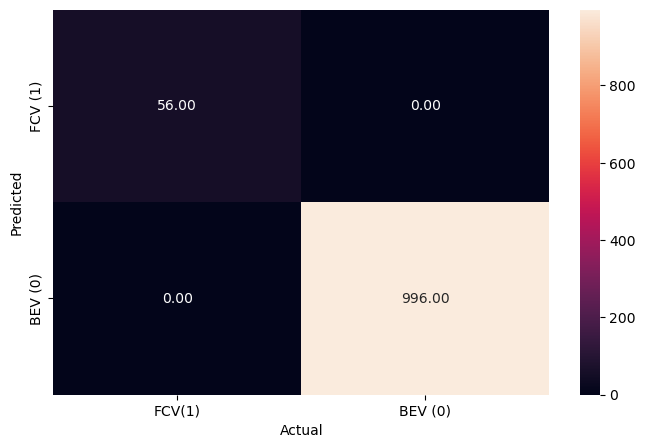

In [58]:
y_pred_test_xgb = xgb_model2.predict(X_test_stdscale)
metrics_score(y_test, y_pred_test_xgb)

In [59]:
print("Accuracy Score:", get_accuracy_score2(xgb_model2, X_test_stdscale, y_test))

Accuracy Score: 1.0


### **Tuning the XGBoost Model**

In [60]:
# Choose the type of classifier. 
xgb_model_tuned = XGBClassifier(max_delta_step = 1, random_state = 1, eval_metric = 'logloss')

# Grid of parameters to choose from
parameters = {"n_estimators": [80, 90, 110],
    "max_depth": [5, 6, 7, 8],
     "learning_rate": [0.1, 0.01, 0.05]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(xgb_model_tuned, parameters, scoring = scorer, cv = 5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train_stdscale, y_train)

# Set the clf to the best combination of parameters
xgb_estimator_tuned_base = grid_obj.best_estimator_

In [61]:
xgb_estimator_tuned_base.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': 1,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 80,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 1,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       131
         1.0       1.00      1.00      1.00      2321

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



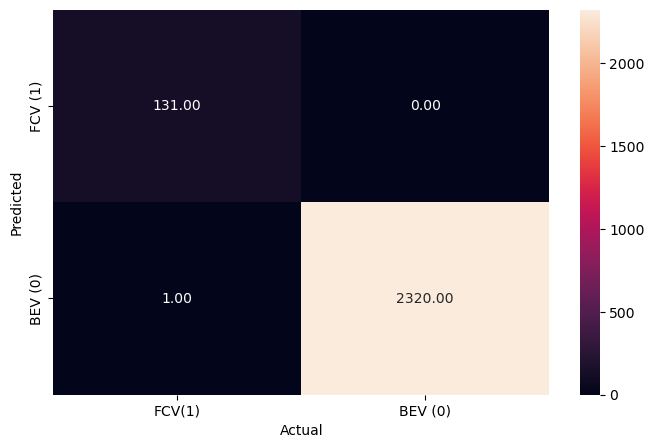

In [62]:
y_pred_train_xgb_tuned = xgb_estimator_tuned_base.predict(X_train_stdscale)
metrics_score(y_train, y_pred_train_xgb_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       1.00      1.00      1.00       996

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



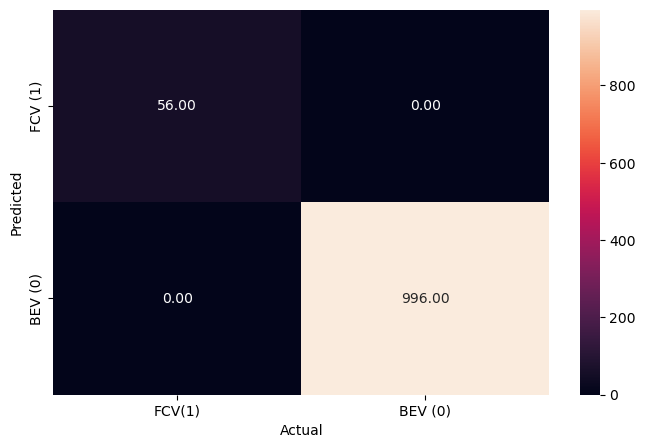

In [63]:
y_pred_test_xgb_tuned = xgb_estimator_tuned_base.predict(X_test_stdscale)
metrics_score(y_test, y_pred_test_xgb_tuned)

#### **Observations**

### **Comparing Model Performances**  

In [65]:
def get_recall_score(model,flag=True,X_train_stdscale=X_train_stdscale,X_test_stdscale=X_test_stdscale):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train_stdscale)
    pred_test = model.predict(X_test_stdscale)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [66]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train_stdscale,X_test= X_test_stdscale):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train_stdscale)
    pred_test = model.predict(X_test_stdscale)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [70]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train_stdscale=X_train_stdscale,X_test_stdscale=X_test_stdscale):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train_stdscale,y_train)
    test_acc = model.score(X_test_stdscale,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train_stdscale,y_train))
        print("Accuracy on test set : ",model.score(X_test_stdscale,y_test))
    
    return c # returning the list with train and test scores

In [71]:
# Make the list of all the model names 

# logistical regression: lg
# decision tree: dt
# decision tree tuned w/GridSearch: d_tree_tuned
# random forest: rf_estimator
# random forest w/weights: rf_weights
# tuned random forest: rf_estimator_tuned_base
models = [lg,dt,d_tree_tuned,rf_estimator,rf_weights, rf_estimator_tuned_base, xgb_model2, xgb_estimator_tuned_base]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [72]:
# Compare the models
comparison_frame = pd.DataFrame({'Model':['Logistical Regression', 'Decision Tree', 'Tuned Decision Tree', 
                                          'Random Forest','Random Forest w/weights', 
                                          'Tuned Random Forest', 'XGBoost', 'Tuned XGBoost'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistical Regression,0.999592,1.0,0.999569,1.0,1.0,1.0
1,Decision Tree,1.000000,1.0,1.000000,1.0,1.0,1.0
2,Tuned Decision Tree,0.999592,1.0,0.999569,1.0,1.0,1.0
3,Random Forest,1.000000,1.0,1.000000,1.0,1.0,1.0
4,Random Forest w/weights,1.000000,1.0,1.000000,1.0,1.0,1.0
5,Tuned Random Forest,1.000000,1.0,1.000000,1.0,1.0,1.0
6,XGBoost,1.000000,1.0,1.000000,1.0,1.0,1.0
7,Tuned XGBoost,0.999592,1.0,0.999569,1.0,1.0,1.0
